In [1]:
import os
from pynwb import NWBHDF5IO

# Path to the downloaded dataset
dataset_path = "000070"

# Example NWB file path
nwb_file_path = os.path.join(
    dataset_path, "sub-Jenkins", "sub-Jenkins_ses-20090916_behavior+ecephys.nwb")

# Verify file exists
assert os.path.exists(
    nwb_file_path), f"NWB file not found at {nwb_file_path}"

# Open the NWB file
io =  NWBHDF5IO(nwb_file_path, 'r')
nwbfile = io.read()

# Basic assertions to verify data loading
assert nwbfile is not None, "Failed to load NWB file"
assert hasattr(nwbfile, 'identifier'), "NWB file missing identifier"

# Print some basic information about the file
print(f"Successfully loaded NWB file: {nwbfile.identifier}")
print(f"Session start time: {nwbfile.session_start_time}")



/home/dima/code/marvin/venv/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/dima/code/marvin/venv/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Successfully loaded NWB file: 48640df0-bc3e-4ef8-ba44-1fe75459150d
Session start time: 2009-09-16 00:00:00-07:00


In [40]:
nwbfile.units[1]['obs_intervals'].iloc[0]

array([[8.85396667e+00, 1.26939667e+01],
       [1.77742000e+01, 2.13489667e+01],
       [2.21438667e+01, 2.57187333e+01],
       ...,
       [1.24047947e+04, 1.24083495e+04],
       [1.24093697e+04, 1.24127097e+04],
       [1.24139097e+04, 1.24170197e+04]], shape=(2265, 2))

In [43]:
# Check if obs_intervals are the same for all units from 0 to 187
intervals_0 = nwbfile.units[0]['obs_intervals'].iloc[0]
all_same = True

for unit_id in range(1, 188):
    if not (nwbfile.units[unit_id]['obs_intervals'].iloc[0] == intervals_0).all():
        all_same = False
        print(f"Unit {unit_id} has different intervals than unit 0")
        break

if all_same:
    print("All units from 0 to 187 have the same observation intervals")
    print("First few intervals:", intervals_0[:10])

All units from 0 to 187 have the same observation intervals
First few intervals: [[ 8.85396667 12.69396667]
 [17.7742     21.34896667]
 [22.14386667 25.71873333]
 [26.579      29.914     ]
 [30.57886667 34.04876667]
 [34.7989     39.35876667]
 [41.36416667 45.03883333]
 [47.06413333 50.25883333]
 [51.03406667 54.11903333]
 [54.90893333 58.72396667]]


In [26]:
nwbfile.units[0]['obs_intervals'][00]

array([[8.85396667e+00, 1.26939667e+01],
       [1.77742000e+01, 2.13489667e+01],
       [2.21438667e+01, 2.57187333e+01],
       ...,
       [1.24047947e+04, 1.24083495e+04],
       [1.24093697e+04, 1.24127097e+04],
       [1.24139097e+04, 1.24170197e+04]], shape=(2265, 2))

In [24]:
nwbfile.units[neuron_idx]['spike_times'][0][200:300]

array([11.16843333, 11.17613333, 11.18233333, 11.20146667, 11.21073333,
       11.2218    , 11.2379    , 11.24263333, 11.2448    , 11.2593    ,
       11.26956667, 11.3015    , 11.32046667, 11.33863333, 11.34496667,
       11.3478    , 11.38526667, 11.51416667, 11.525     , 11.60426667,
       11.6225    , 11.65526667, 11.6609    , 11.71423333, 11.7422    ,
       11.7491    , 11.7995    , 11.80986667, 11.83186667, 11.8688    ,
       11.87706667, 11.9161    , 11.9191    , 11.9938    , 12.08023333,
       12.16133333, 12.1804    , 12.1827    , 12.20196667, 12.21036667,
       12.2197    , 12.22496667, 12.22966667, 12.2659    , 12.29043333,
       12.29713333, 12.31183333, 12.31786667, 12.32016667, 12.33803333,
       12.4032    , 12.41383333, 12.41553333, 12.43886667, 12.44286667,
       12.4481    , 12.45833333, 12.4602    , 12.46503333, 12.46946667,
       12.47156667, 12.4927    , 12.49553333, 12.50013333, 12.52736667,
       12.53106667, 12.53483333, 12.56716667, 12.57363333, 12.58

In [19]:
nwbfile

Data type,float64
Shape,"(6821875, 2)"
Array size,104.09 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(6821875,)"
Array size,52.05 MiB
Chunk shape,None


/tmp/ipykernel_53171/3723092925.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


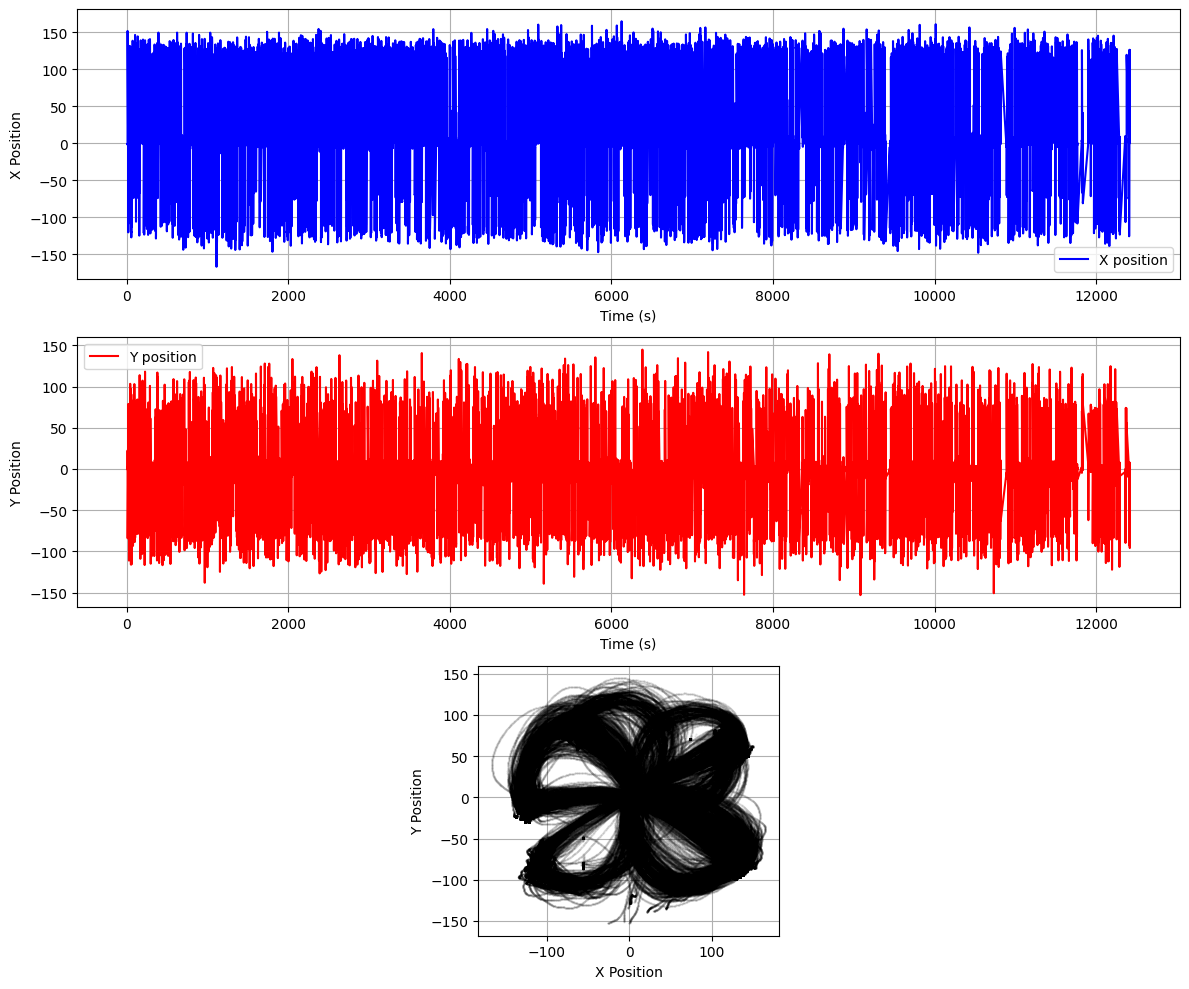

In [ ]:
position_of = 'Cursor'
data = nwbfile.processing['behavior'].data_interfaces['Position'][position_of].data[:]
timestamps = nwbfile.processing['behavior'].data_interfaces['Position'][position_of].timestamps[:]

import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot x position over time
ax1.plot(timestamps, data[:, 0], 'b-', label='X position')
ax1.set_ylabel('X Position')
ax1.set_xlabel('Time (s)')
ax1.legend()
ax1.grid(True)

# Plot y position over time 
ax2.plot(timestamps, datanwbfile.units[neuron_idx]['spike_times'][0])
ax3.set_ylabel('Y Position')
ax3.set_aspect('equal')
ax3.grid(True)

plt.tight_layout()
plt.show()


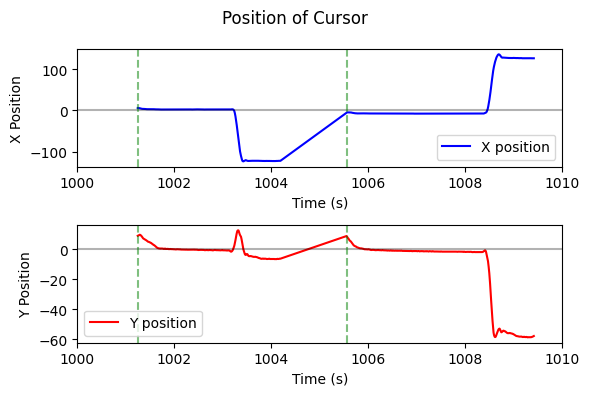

In [60]:
position_of = 'Cursor'
data = nwbfile.processing['behavior'].data_interfaces['Position'][position_of].data[:]
timestamps = nwbfile.processing['behavior'].data_interfaces['Position'][position_of].timestamps[:]

import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))

# Get indices for first 100 seconds
timestamps_from = 1000
timestamps_to = 1010
mask = (timestamps_from <= timestamps) & (timestamps <= timestamps_to)
plot_timestamps = timestamps[mask]
plot_data = data[mask]

# Get trial start times within first 100 seconds
trials = nwbfile.intervals['trials']
trial_starts = trials['start_time'][:]
trial_starts_mask = (timestamps_from <= trial_starts) & (trial_starts <= timestamps_to)
trial_starts_plot = trial_starts[trial_starts_mask]

# Plot x position over time
ax1.plot(plot_timestamps, plot_data[:, 0], 'b-', label='X position')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.set_ylabel('X Position')
ax1.set_xlabel('Time (s)')
for trial_start in trial_starts_plot:
    ax1.axvline(x=trial_start, color='g', linestyle='--', alpha=0.5)
ax1.legend()
#ax1.grid(True)
ax1.set_xlim(timestamps_from, timestamps_to)

# Plot y position over time 
ax2.plot(plot_timestamps, plot_data[:, 1], 'r-', label='Y position')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.set_ylabel('Y Position')
ax2.set_xlabel('Time (s)') 
for trial_start in trial_starts_plot:
    ax2.axvline(x=trial_start, color='g', linestyle='--', alpha=0.5)
ax2.legend()
#ax2.grid(True)
ax2.set_xlim(timestamps_from, timestamps_to)

plt.suptitle('Position of ' + position_of)

plt.tight_layout()
plt.show()


In [66]:
nwbfile.trials[0].iloc[0]

start_time                                                           8.853967
stop_time                                                           12.693967
target_presentation_time                                             9.751967
go_cue_time                                                         10.498967
reaction_time                                                           0.375
move_begins_time                                                    10.830967
move_ends_time                                                      11.295967
discard_trial                                                               0
task_success                                                                1
trial_type                                                                  6
trial_version                                                               2
proto_trial                                                                 0
maze_condition                                                  

In [65]:
nwbfile.trials[0]

,start_time,stop_time,target_presentation_time,go_cue_time,reaction_time,move_begins_time,move_ends_time,discard_trial,task_success,trial_type,...,correct_reach,maze_num_targets,maze_num_barriers,novel_maze,target_positions,frame_details,hit_target_position,target_size,barrier_info,timeseries
id,,,,,,,,,,,,,,,,,,,,,
0,8.853967,12.693967,9.751967,10.498967,0.375,10.830967,11.295967,0,1,6,...,1,3,9,0,"[[133, -81], [-118, -83], [-77, 82]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[133, -81]",13,"[[-33.0, 47.0, 6.0, 37.0], [-77.0, 48.0, 11.0,...","[(0, 3141, Eye pynwb.behavior.SpatialSeries at..."


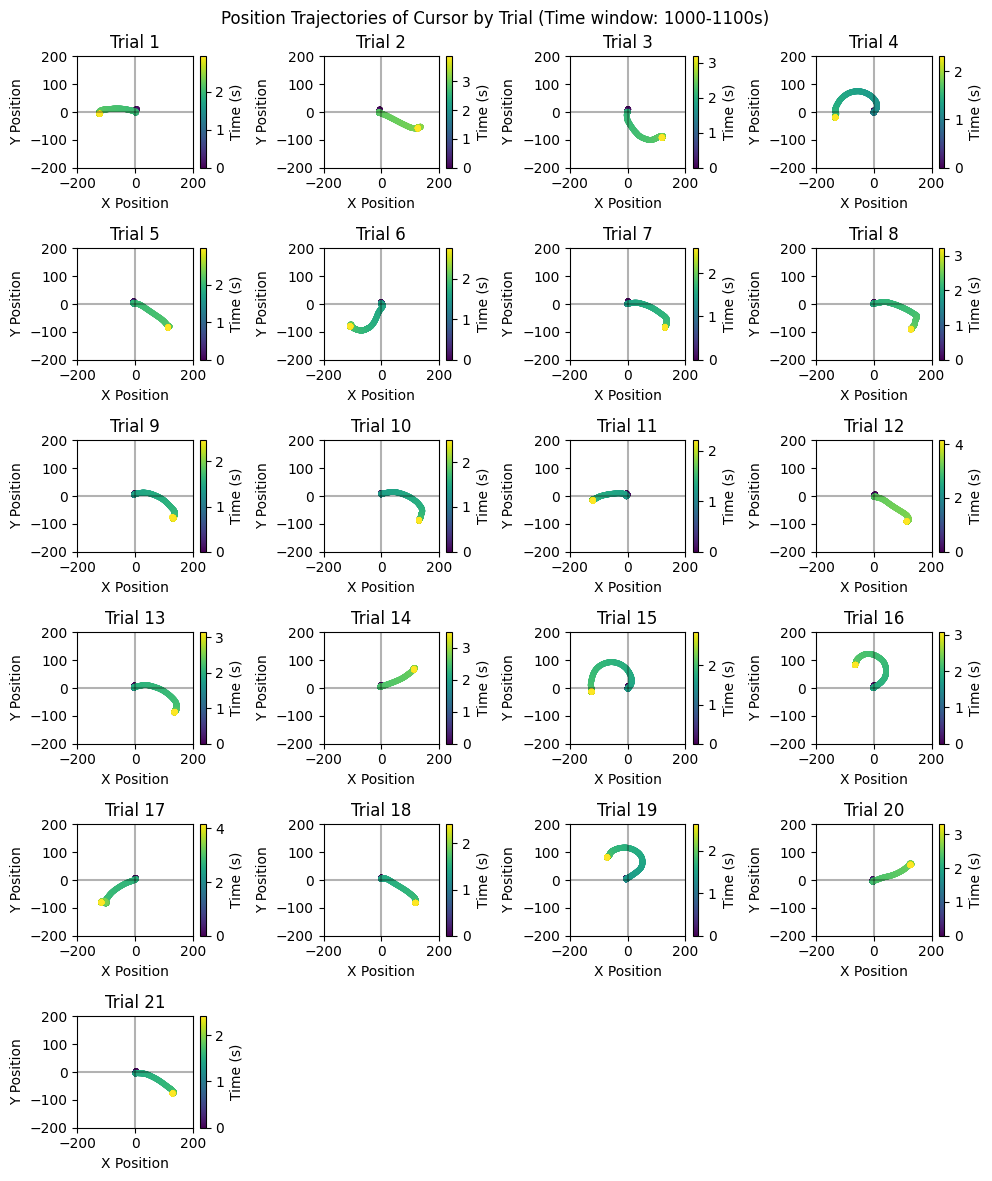

In [ ]:
position_of = 'Cursor'
data = nwbfile.processing['behavior'].data_interfaces['Position'][position_of].data[:]
timestamps = nwbfile.processing['behavior'].data_interfaces['Position'][position_of].timestamps[:]

# Get all trials
trials = nwbfile.intervals['trials']
trial_starts = trials['start_time'][:]
trial_ends = trials['stop_time'][:]

# Filter trials within time window
timestamps_from = 1000
timestamps_to = 1100
trial_mask = (trial_starts >= timestamps_from) & (trial_starts <= timestamps_to)
filtered_trial_starts = trial_starts[trial_mask]
filtered_trial_ends = trial_ends[trial_mask]

# Create a figure with subplots for filtered trials
n_trials = len(filtered_trial_starts)
n_cols = 4
n_rows = (n_trials + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 2*n_rows))
axes = axes.flatten()

for trial_idx in range(n_trials):
    # Get data for this trial
    trial_mask = (filtered_trial_starts[trial_idx] <= timestamps) & (timestamps <= filtered_trial_ends[trial_idx])
    trial_timestamps = timestamps[trial_mask]train_dev_sets = torch.utils.data.ConcatDataset([train_set, dev_set])

    scatter = axes[trial_idx].scatter(trial_data[:, 0], 
                                    trial_data[:, 1],
                                    c=norm_timestamps,
                                    cmap='viridis',
                                    s=10)
    
    axes[trial_idx].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axes[trial_idx].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    axes[trial_idx].set_title(f'Trial {trial_idx+1}')
    axes[trial_idx].set_xlabel('X Position')
    axes[trial_idx].set_ylabel('Y Position')
    axes[trial_idx].set_xlim(-200, 200)
    axes[trial_idx].set_ylim(-200, 200)
    
    # Add colorbar
    plt.colorbar(scatter, ax=axes[trial_idx], label='Time (s)')

# Remove empty subplots
for idx in range(n_trials, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle(f'Position Trajectories of {position_of} by Trial (Time window: {timestamps_from}-{timestamps_to}s)')
plt.tight_layout()
plt.show()


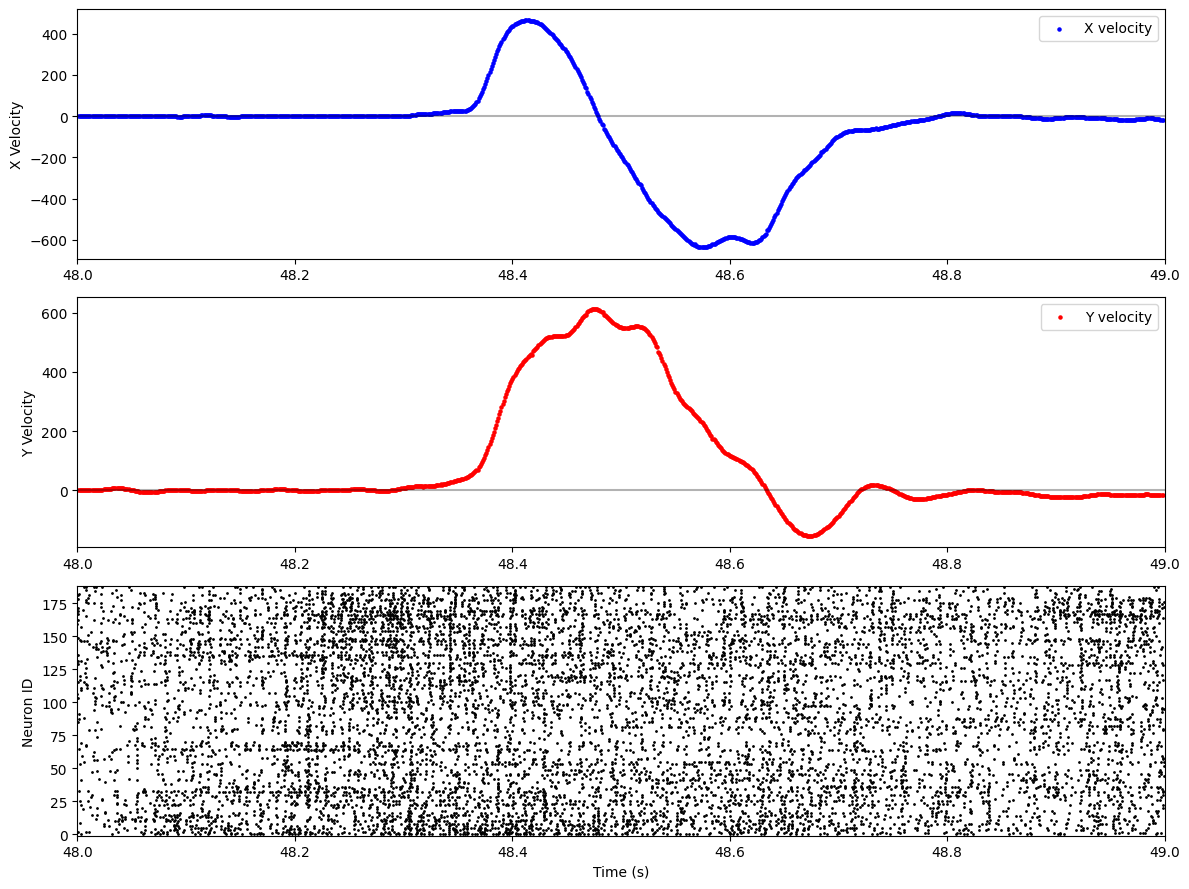

In [55]:
position_of = 'Hand'
data = nwbfile.processing['behavior'].data_interfaces['Position'][position_of].data[:]
timestamps = nwbfile.processing['behavior'].data_interfaces['Position'][position_of].timestamps[:]

import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 3 subplots (3x1)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9))

# Get indices for time window
timestamps_from = 48
timestamps_to = 49
mask = (timestamps_from <= timestamps) & (timestamps <= timestamps_to)
plot_timestamps = timestamps[mask]
plot_data = data[mask]

# Calculate velocities
dt = np.diff(plot_timestamps)
velocity_x = np.diff(plot_data[:, 0]) / dt
velocity_y = np.diff(plot_data[:, 1]) / dt
velocity_timestamps = plot_timestamps[:-1]  # One fewer point due to diff

# Get trial start and stop times within time window
trials = nwbfile.intervals['trials']
trial_starts = trials['start_time'][:]
trial_stops = trials['stop_time'][:]
trial_starts_mask = (timestamps_from <= trial_starts) & (trial_starts <= timestamps_to)
trial_stops_mask = (timestamps_from <= trial_stops) & (trial_stops <= timestamps_to)
trial_starts_plot = trial_starts[trial_starts_mask]
trial_stops_plot = trial_stops[trial_stops_mask]

# Plot x velocity over time
ax1.scatter(velocity_timestamps, velocity_x, c='b', s=5, label='X velocity')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.set_ylabel('X Velocity')
for trial_start in trial_starts_plot:
    ax1.axvline(x=trial_start, color='g', linestyle='--', alpha=0.5)
for trial_stop in trial_stops_plot:
    ax1.axvline(x=trial_stop, color='r', linestyle='--', alpha=0.5)
ax1.legend()
ax1.set_xlim(timestamps_from, timestamps_to)

# Plot y velocity over time
ax2.scatter(velocity_timestamps, velocity_y, c='r', s=5, label='Y velocity')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.set_ylabel('Y Velocity')
for trial_start in trial_starts_plot:
    ax2.axvline(x=trial_start, color='g', linestyle='--', alpha=0.5)
for trial_stop in trial_stops_plot:
    ax2.axvline(x=trial_stop, color='r', linestyle='--', alpha=0.5)
ax2.legend()
ax2.set_xlim(timestamps_from, timestamps_to)

# Plot spike raster
ax3.set_ylabel('Neuron ID')
ax3.set_xlabel('Time (s)')
for neuron_idx in range(188):
    spike_times = nwbfile.units[neuron_idx]['spike_times'].iloc[0]
    spike_mask = (timestamps_from <= spike_times) & (spike_times <= timestamps_to)
    filtered_spikes = spike_times[spike_mask]
    ax3.scatter(filtered_spikes, [neuron_idx] * len(filtered_spikes), s=1, c='k')
ax3.set_ylim(-1, 188)
ax3.set_xlim(timestamps_from, timestamps_to)
for trial_start in trial_starts_plot:
    ax3.axvline(x=trial_start, color='g', linestyle='--', alpha=0.5)
for trial_stop in trial_stops_plot:
    ax3.axvline(x=trial_stop, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


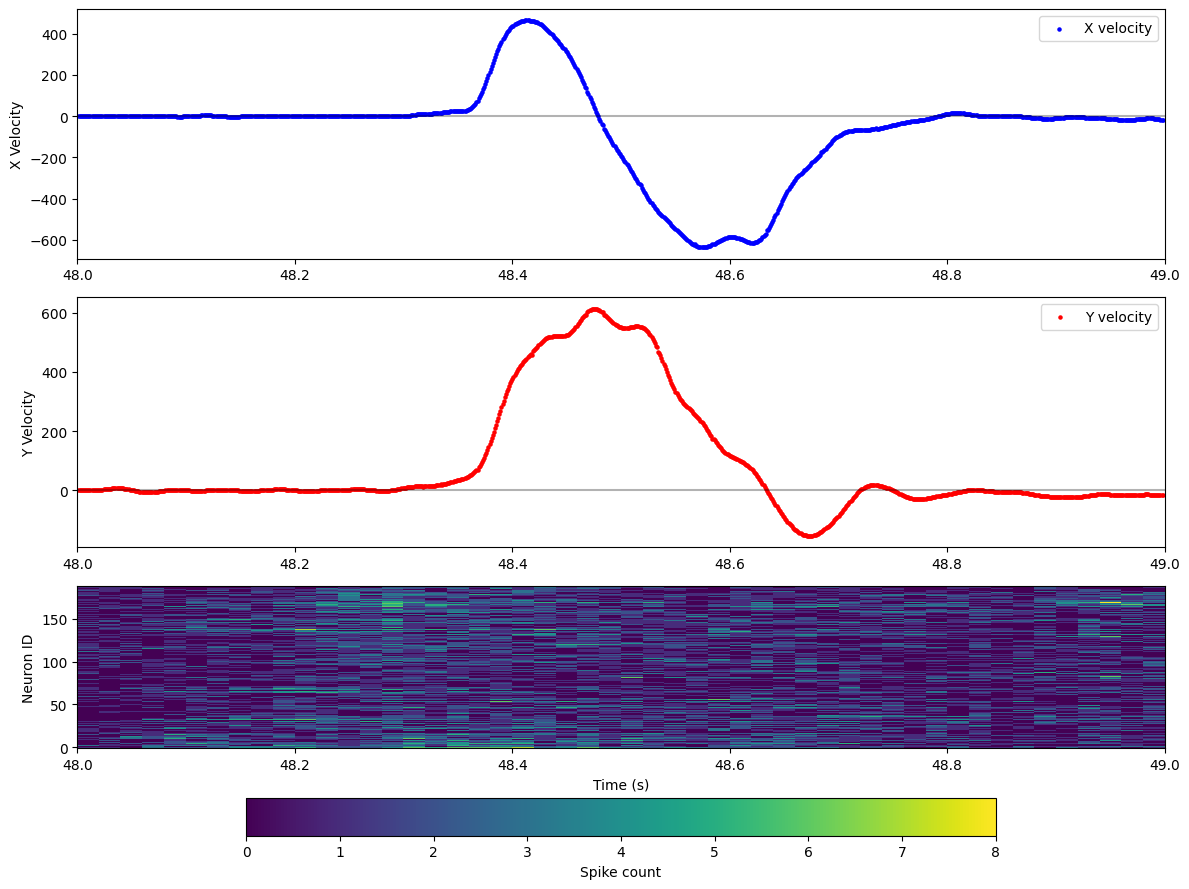

In [58]:
position_of = 'Hand'
data = nwbfile.processing['behavior'].data_interfaces['Position'][position_of].data[:]
timestamps = nwbfile.processing['behavior'].data_interfaces['Position'][position_of].timestamps[:]

import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 3 subplots (3x1)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9))

# Get indices for time window
timestamps_from = 48
timestamps_to = 49
mask = (timestamps_from <= timestamps) & (timestamps <= timestamps_to)
plot_timestamps = timestamps[mask]
plot_data = data[mask]

# Calculate velocities
dt = np.diff(plot_timestamps)
velocity_x = np.diff(plot_data[:, 0]) / dt
velocity_y = np.diff(plot_data[:, 1]) / dt
velocity_timestamps = plot_timestamps[:-1]  # One fewer point due to diff

# Get trial start and stop times within time window
trials = nwbfile.intervals['trials']
trial_starts = trials['start_time'][:]
trial_stops = trials['stop_time'][:]
trial_starts_mask = (timestamps_from <= trial_starts) & (trial_starts <= timestamps_to)
trial_stops_mask = (timestamps_from <= trial_stops) & (trial_stops <= timestamps_to)
trial_starts_plot = trial_starts[trial_starts_mask]
trial_stops_plot = trial_stops[trial_stops_mask]

# Plot x velocity over time
ax1.scatter(velocity_timestamps, velocity_x, c='b', s=5, label='X velocity')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.set_ylabel('X Velocity')
for trial_start in trial_starts_plot:
    ax1.axvline(x=trial_start, color='g', linestyle='--', alpha=0.5)
for trial_stop in trial_stops_plot:
    ax1.axvline(x=trial_stop, color='r', linestyle='--', alpha=0.5)
ax1.legend()
ax1.set_xlim(timestamps_from, timestamps_to)

# Plot y velocity over time
ax2.scatter(velocity_timestamps, velocity_y, c='r', s=5, label='Y velocity')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.set_ylabel('Y Velocity')
for trial_start in trial_starts_plot:
    ax2.axvline(x=trial_start, color='g', linestyle='--', alpha=0.5)
for trial_stop in trial_stops_plot:
    ax2.axvline(x=trial_stop, color='r', linestyle='--', alpha=0.5)
ax2.legend()
ax2.set_xlim(timestamps_from, timestamps_to)

# Create spike count bins
bin_size = 0.02  # 50ms
num_bins = int((timestamps_to - timestamps_from) / bin_size)
bin_edges = np.linspace(timestamps_from, timestamps_to, num_bins + 1)
spike_counts = np.zeros((188, num_bins))

# Fill spike count matrix
for neuron_idx in range(188):
    spike_times = nwbfile.units[neuron_idx]['spike_times'].iloc[0]
    spike_mask = (timestamps_from <= spike_times) & (spike_times <= timestamps_to)
    filtered_spikes = spike_times[spike_mask]
    counts, _ = np.histogram(filtered_spikes, bins=bin_edges)
    spike_counts[neuron_idx] = counts

# Plot spike count heatmap
im = ax3.imshow(spike_counts, aspect='auto', interpolation='nearest', 
                extent=[timestamps_from, timestamps_to, -1, 188],
                cmap='viridis', origin='lower')

# Add horizontal colorbar at the bottom
cbar = plt.colorbar(im, ax=ax3, orientation='horizontal', pad=0.2, label='Spike count')

ax3.set_ylabel('Neuron ID')
ax3.set_xlabel('Time (s)')
for trial_start in trial_starts_plot:
    ax3.axvline(x=trial_start, color='g', linestyle='--', alpha=0.5)
for trial_stop in trial_stops_plot:
    ax3.axvline(x=trial_stop, color='r', linestyle='--', alpha=0.5)
ax3.set_xlim(timestamps_from, timestamps_to)

plt.tight_layout()
plt.show()


In [25]:
nwbfile.intervals['trials'][-1]


,start_time,stop_time,target_presentation_time,go_cue_time,reaction_time,move_begins_time,move_ends_time,discard_trial,task_success,trial_type,...,correct_reach,maze_num_targets,maze_num_barriers,novel_maze,target_positions,frame_details,hit_target_position,target_size,barrier_info,timeseries
id,,,,,,,,,,,,,,,,,,,,,
2264,12413.909665,12417.019698,12414.622665,12414.619665,0.46,12415.046665,12415.631665,0,1,3,...,1,1,8,0,"[[131, -55]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[131, -55]",13,"[[-64.0, -47.0, 113.0, 7.0], [-64.0, -39.0, 40...","[(6819454, 2421, Eye pynwb.behavior.SpatialSer..."


In [10]:
# Get spiking data from the units table
units = nwbfile.units
print("Number of units:", len(units))

# Get spike times and other relevant data
spike_times = units['spike_times'].data[:]
unit_ids = units.id[:]

print("\nSpike data summary:")
print(f"Total units recorded: {len(unit_ids)}")
print(f"First few spike times for unit {unit_ids[0]}: {spike_times[0][:5]}")

Number of units: 192

Spike data summary:
Total units recorded: 192


IndexError: invalid index to scalar variable.

In [16]:
units['spike_times'][i]

array([8.89740000e+00, 8.93616667e+00, 8.97396667e+00, ...,
       1.24169843e+04, 1.24169898e+04, 1.24170154e+04], shape=(318272,))

In [15]:
for i in range(len(units['spike_times'])):
    print("Unit", i, "has", units['spike_times'][i].shape[0], "spikes")

Unit 0 has 16207 spikes
Unit 1 has 802998 spikes
Unit 2 has 455701 spikes
Unit 3 has 360148 spikes
Unit 4 has 293615 spikes
Unit 5 has 387845 spikes
Unit 6 has 498302 spikes
Unit 7 has 225181 spikes
Unit 8 has 345846 spikes
Unit 9 has 299504 spikes
Unit 10 has 419619 spikes
Unit 11 has 317178 spikes
Unit 12 has 440448 spikes
Unit 13 has 434534 spikes
Unit 14 has 201427 spikes
Unit 15 has 466471 spikes
Unit 16 has 446425 spikes
Unit 17 has 242783 spikes
Unit 18 has 328925 spikes
Unit 19 has 223931 spikes
Unit 20 has 406323 spikes
Unit 21 has 206178 spikes
Unit 22 has 403130 spikes
Unit 23 has 283687 spikes
Unit 24 has 220664 spikes
Unit 25 has 405550 spikes
Unit 26 has 330549 spikes
Unit 27 has 112659 spikes
Unit 28 has 403358 spikes
Unit 29 has 303911 spikes
Unit 30 has 404870 spikes
Unit 31 has 228298 spikes
Unit 32 has 448170 spikes
Unit 33 has 351235 spikes
Unit 34 has 254585 spikes
Unit 35 has 223315 spikes
Unit 36 has 303901 spikes
Unit 37 has 185617 spikes
Unit 38 has 13939 spike